Time Lag & Impact Analysis (Causal Lag Modelling)

**Business Context:** Strategic interventions like marketing spend often have delayed effects. Understanding these causal lags helps optimise timing and forecast impact.

**Question:** How long after an intervention does its impact manifest, and how strong is the delayed effect?

**Approach:**
- Simulate time series data for a shock variable (e.g., marketing spend) and a response variable (e.g., revenue)
- Use lagged regression to estimate delayed effects
- Visualise lag structure and identify optimal timing

 **Keywords:** Causal lag, time series, delayed impact, regression, strategic timing

In [1]:
# --- Notebook Setup & Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Simulate Time Series Data ---
np.random.seed(42)
T = 100  # time periods
shock = np.random.normal(loc=100, scale=20, size=T)  # marketing spend
noise = np.random.normal(scale=10, size=T)

# --- Create lagged impact: revenue responds with delay ---
response = (
    0.2 * np.roll(shock, 1) +
    0.3 * np.roll(shock, 2) +
    0.1 * np.roll(shock, 3) +
    noise
)
response[:3] = noise[:3]  # fix initial values

# --- Prepare Lagged Regression Data ---
df = pd.DataFrame({
    'response': response,
    'shock_lag1': np.roll(shock, 1),
    'shock_lag2': np.roll(shock, 2),
    'shock_lag3': np.roll(shock, 3)
})
df.iloc[:3] = np.nan  
df.dropna(inplace=True)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     18.95
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           1.13e-09
Time:                        14:03:49   Log-Likelihood:                -355.51
No. Observations:                  97   AIC:                             719.0
Df Residuals:                      93   BIC:                             729.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4733      9.382     -0.264      0.7

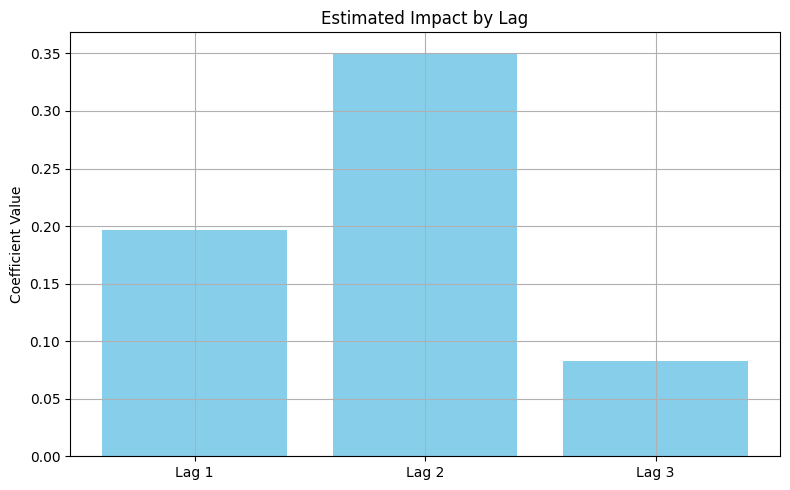

In [2]:
# --- Running the Lagged Regression Function ---
X = df[['shock_lag1', 'shock_lag2', 'shock_lag3']]
X = sm.add_constant(X)
y = df['response']
model = sm.OLS(y, X).fit()
print(model.summary())

# --- Visualize Lag Coefficients ---
plt.figure(figsize=(8, 5))
plt.bar(['Lag 1', 'Lag 2', 'Lag 3'], model.params[1:], color='skyblue')
plt.title('Estimated Impact by Lag')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()

--- Executive Summary & Strategic Recommendation ---

**Strategic Insight:**
- **Impact** of interventions is **not immediate**—lags vary by channel and context
- **Lagged regression** reveals **timing structure**, enabling better forecasting
- **Peak impact** occurs around **Lag 2**, guiding campaign pacing
- **Recommendation** Use Causal Lag modelling to time interventions for maximum ROI, monitor lag coefficients to adjuest strategy dynamically. Finally, integrate lag insights into funnel forecasting and budget allocation

**Actionable Guidance:**
- Run lagged regression on historical campaign data to uncover delay patterns
- Use lag plots to visualize timing of impact
- Define thresholds for actionable lag (e.g., impact > 10%) to guide decision timing
- Combine with Prophet or ARIMA models for full funnel forecasting

